## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from homography import getH

## Setup the problem

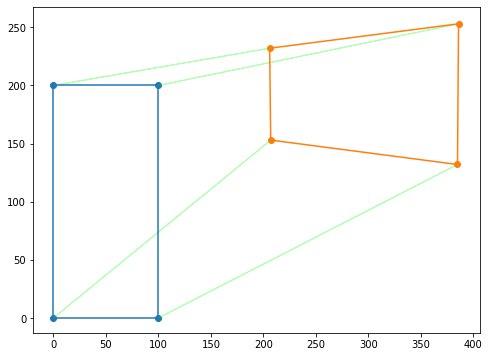

In [2]:
p1 = np.array([[0, 0], [100, 0], [100, 200], [0, 200]])
p2 = np.array([[207, 153], [385, 132], [386, 253], [206, 232]])

plt.figure(figsize=(8, 6))
plt.scatter(p1[:, 0], p1[:, 1])
plt.plot([p1[0, 0], p1[1, 0], p1[2, 0],p1[3, 0], p1[0, 0]],
        [p1[0, 1], p1[1, 1], p1[2, 1],p1[3, 1], p1[0, 1]])

plt.scatter(p2[:, 0], p2[:, 1])
plt.plot([p2[0, 0], p2[1, 0], p2[2, 0], p2[3, 0], p2[0, 0]],
        [p2[0, 1], p2[1, 1], p2[2, 1], p2[3, 1], p2[0, 1]])

for i in range(4):
    plt.arrow(p2[i][0], p2[i][1], -p2[i][0]+p1[i][0], -p2[i][1]+p1[i][1], color=(0, 1, 0, 0.3))

## Calculate the homography

In [28]:
H = getH(p1, p2) # you will have to code this part yourself
print(H)

[[ 1.74732299e-03 -2.58760996e-03 -1.34226526e-05]
 [-5.62035637e-05  1.49309691e-03 -1.78540205e-07]
 [ 8.04165255e-01  5.94383015e-01  3.88485631e-03]]


## Using H to go from p1 to p2

$$
P' = P H
$$

In [29]:
for i in range(4):
    # remember that H is 3x3, so P needs to be 3x1
    P = np.array([p1[i][0], p1[i][1], 1.])
    out = P @ H
    out /= out[-1]
    print(P[:2].astype(int), '->',out.astype(int)[:2])

[0 0] -> [207 152]
[100   0] -> [384 131]
[100 200] -> [386 253]
[  0 200] -> [206 232]


## Can we go from p2 to p1?

In [30]:
H_inv = np.linalg.inv(H) # use the inverse of H!

for i in range(4):
    P = np.array([p2[i][0], p2[i][1], 1.])
    out = P @ H_inv
    out /= out[-1]
    print(np.round(P[:2]).astype(int), '->',np.round(out).astype(int)[:2])

[207 153] -> [0 0]
[385 132] -> [100   0]
[386 253] -> [100 200]
[206 232] -> [  0 200]


In [32]:
H_p2p1 = getH(p2, p1)

(array([[-4.82822615e-03,  9.99988054e-01,  7.62272423e-04],
        [-7.07507350e-01, -3.95474678e-03,  7.06694920e-01],
        [ 7.06689492e-01,  2.87276954e-03,  7.07517992e-01]]),
 array([7.95655116e-06, 7.95655116e-06, 7.95655115e-06]),
 array([[ 4.82822615e-03,  7.07507351e-01, -7.06689491e-01],
        [-9.99988054e-01,  3.95474678e-03, -2.87276954e-03],
        [-7.62272420e-04, -7.06694919e-01, -7.07517993e-01]]))

## Visualization

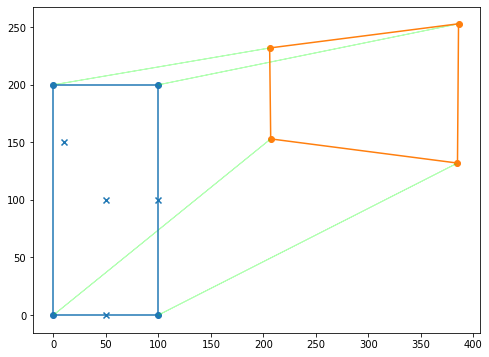

In [41]:
p1_probe = np.array([[50, 0], [100, 100], [50, 100], [10, 150]])    

plt.figure(figsize=(8, 6))
plt.scatter(p1[:, 0], p1[:, 1])
plt.plot([p1[0, 0], p1[1, 0], p1[2, 0],p1[3, 0], p1[0, 0]],
        [p1[0, 1], p1[1, 1], p1[2, 1],p1[3, 1], p1[0, 1]])

plt.scatter(p2[:, 0], p2[:, 1])
plt.plot([p2[0, 0], p2[1, 0], p2[2, 0], p2[3, 0], p2[0, 0]],
        [p2[0, 1], p2[1, 1], p2[2, 1], p2[3, 1], p2[0, 1]])

for i in range(4):
    plt.arrow(p2[i][0], p2[i][1], -p2[i][0]+p1[i][0], -p2[i][1]+p1[i][1], color=(0, 1, 0, 0.3))
    

plt.scatter(p1_probe[:, 0], p1_probe[:, 1], marker='x', color='#1f77b4')

In [42]:
p2_match = []
for i in range(4):
    P = np.array([p1_probe[i][0], p1_probe[i][1], 1.])
    out = P @ H
    out /= out[-1]
    out = out[:2]
    print(P[:2].astype(int), '->',out.astype(int))
    p2_match.append(out)
p2_match = np.array(p2_match)

[50  0] -> [277 144]
[100 100] -> [385 192]
[ 50 100] -> [277 192]
[ 10 150] -> [218 212]


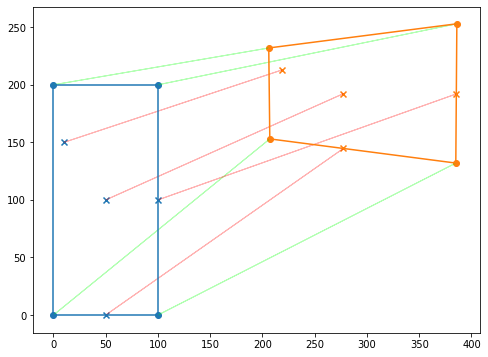

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(p1[:, 0], p1[:, 1])
plt.plot([p1[0, 0], p1[1, 0], p1[2, 0],p1[3, 0], p1[0, 0]],
        [p1[0, 1], p1[1, 1], p1[2, 1],p1[3, 1], p1[0, 1]])

plt.scatter(p2[:, 0], p2[:, 1])
plt.plot([p2[0, 0], p2[1, 0], p2[2, 0], p2[3, 0], p2[0, 0]],
        [p2[0, 1], p2[1, 1], p2[2, 1], p2[3, 1], p2[0, 1]])

for i in range(4):
    plt.arrow(p2[i][0], p2[i][1], -p2[i][0]+p1[i][0], -p2[i][1]+p1[i][1], color=(0, 1, 0, 0.3))
    

plt.scatter(p1_probe[:, 0], p1_probe[:, 1], marker='x', color='#1f77b4')

plt.scatter(p2_match[:, 0], p2_match[:, 1], marker='x', color='#ff7f0e')

for i in range(4):
    plt.arrow(p2_match[i][0], p2_match[i][1], 
              -p2_match[i][0] + p1_probe[i][0], -p2_match[i][1] + p1_probe[i][1], 
              color=(1, 0, 0, 0.3))

## Take it a step further

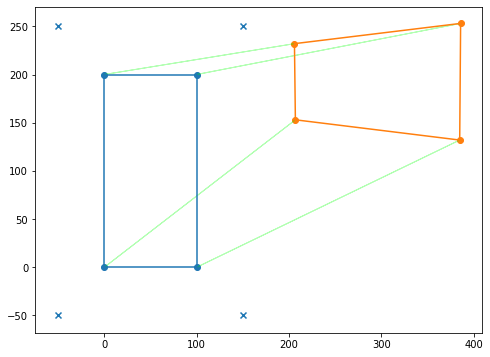

In [44]:
p1_probe = np.array([[-50, -50], [150, -50], [150, 250], [-50, 250]])    

plt.figure(figsize=(8, 6))
plt.scatter(p1[:, 0], p1[:, 1])
plt.plot([p1[0, 0], p1[1, 0], p1[2, 0],p1[3, 0], p1[0, 0]],
        [p1[0, 1], p1[1, 1], p1[2, 1],p1[3, 1], p1[0, 1]])

plt.scatter(p2[:, 0], p2[:, 1])
plt.plot([p2[0, 0], p2[1, 0], p2[2, 0], p2[3, 0], p2[0, 0]],
        [p2[0, 1], p2[1, 1], p2[2, 1], p2[3, 1], p2[0, 1]])

for i in range(4):
    plt.arrow(p2[i][0], p2[i][1], -p2[i][0]+p1[i][0], -p2[i][1]+p1[i][1], color=(0, 1, 0, 0.3))
    

plt.scatter(p1_probe[:, 0], p1_probe[:, 1], marker='x', color='#1f77b4')

In [45]:
p2_match = []
for i in range(4):
    P = np.array([p1_probe[i][0], p1_probe[i][1], 1.])
    out = P @ H
    out /= out[-1]
    out = out[:2]
    print(P[:2].astype(int), '->',out.astype(int))
    p2_match.append(out)
p2_match = np.array(p2_match)

[-50 -50] -> [157 142]
[150 -50] -> [568  69]
[150 250] -> [575 317]
[-50 250] -> [155 243]


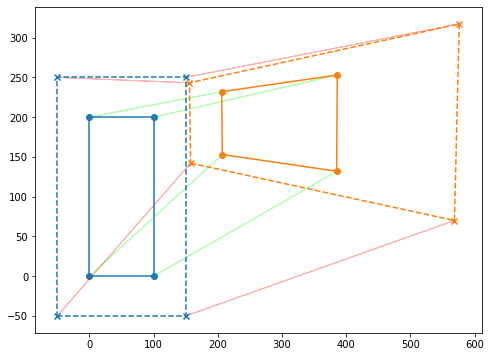

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(p1[:, 0], p1[:, 1])
plt.plot([p1[0, 0], p1[1, 0], p1[2, 0],p1[3, 0], p1[0, 0]],
        [p1[0, 1], p1[1, 1], p1[2, 1],p1[3, 1], p1[0, 1]])

plt.scatter(p2[:, 0], p2[:, 1])
plt.plot([p2[0, 0], p2[1, 0], p2[2, 0], p2[3, 0], p2[0, 0]],
        [p2[0, 1], p2[1, 1], p2[2, 1], p2[3, 1], p2[0, 1]])

for i in range(4):
    plt.arrow(p2[i][0], p2[i][1], -p2[i][0]+p1[i][0], -p2[i][1]+p1[i][1], color=(0, 1, 0, 0.3))
    

plt.scatter(p1_probe[:, 0], p1_probe[:, 1], marker='x', color='#1f77b4')

plt.scatter(p2_match[:, 0], p2_match[:, 1], marker='x', color='#ff7f0e')

for i in range(4):
    plt.arrow(p2_match[i][0], p2_match[i][1], 
              -p2_match[i][0] + p1_probe[i][0], -p2_match[i][1] + p1_probe[i][1], 
              color=(1, 0, 0, 0.3))

plt.plot([p1_probe[0, 0], p1_probe[1, 0], p1_probe[2, 0],p1_probe[3, 0], p1_probe[0, 0]],
        [p1_probe[0, 1], p1_probe[1, 1], p1_probe[2, 1],p1_probe[3, 1], p1_probe[0, 1]], '--', color='#1f77b4')

plt.plot([p2_match[0, 0], p2_match[1, 0], p2_match[2, 0],p2_match[3, 0], p2_match[0, 0]],
        [p2_match[0, 1], p2_match[1, 1], p2_match[2, 1],p2_match[3, 1], p2_match[0, 1]], '--', color='#ff7f0e')